# Testing our Neural Network
Building off PA4, let's test our neural network on the MNIST dataset.
We'll start by installing our dependencies

In [1]:
%pip install numpy keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
from keras.utils import to_categorical


def preprocess_data(
    x: np.ndarray, y: np.ndarray, limit: int
) -> tuple[np.ndarray, np.ndarray]:
    x = x.reshape(x.shape[0], 28 * 28, 1)
    x = x.astype('float32') / 255
    y = to_categorical(y)
    y = y.reshape(y.shape[0], 10, 1)
    return x[:limit], y[:limit]

In [3]:
from keras.datasets import mnist
from neural_network.dataset import Dataset


(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, y_train = preprocess_data(x_train, y_train, 1_000)
x_test, y_test = preprocess_data(x_test, y_test, 100)

train_set = Dataset(xs=x_train, ys=y_train)
test_set = Dataset(xs=x_test, ys=y_test)

Epoch 10/1000 | Average Error 0.06326428119958181 | Average Accuracy 0.756
Epoch 20/1000 | Average Error 0.05119669299208086 | Average Accuracy 0.834
Epoch 30/1000 | Average Error 0.045562852896648576 | Average Accuracy 0.877
Epoch 40/1000 | Average Error 0.04197819044281563 | Average Accuracy 0.892
Epoch 50/1000 | Average Error 0.03935639717478144 | Average Accuracy 0.905
Epoch 60/1000 | Average Error 0.03728128816646857 | Average Accuracy 0.917
Epoch 70/1000 | Average Error 0.035553327739310074 | Average Accuracy 0.925
Epoch 80/1000 | Average Error 0.03406349051836024 | Average Accuracy 0.931
Epoch 90/1000 | Average Error 0.03274689792793603 | Average Accuracy 0.938
Epoch 100/1000 | Average Error 0.031562504826621034 | Average Accuracy 0.941
Epoch 110/1000 | Average Error 0.030483082510015542 | Average Accuracy 0.945
Epoch 120/1000 | Average Error 0.029489832815262025 | Average Accuracy 0.945
Epoch 130/1000 | Average Error 0.028569296701864737 | Average Accuracy 0.948
Epoch 140/1000 

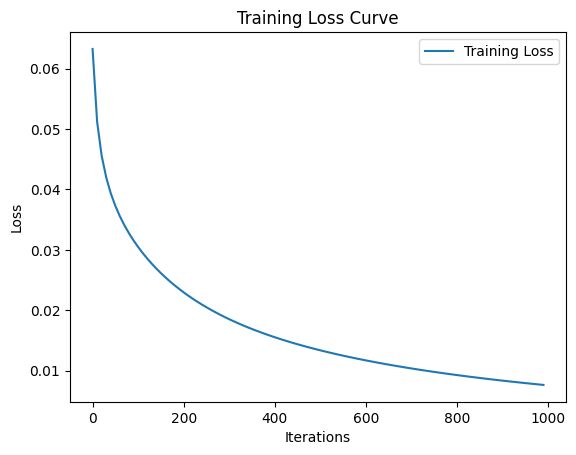

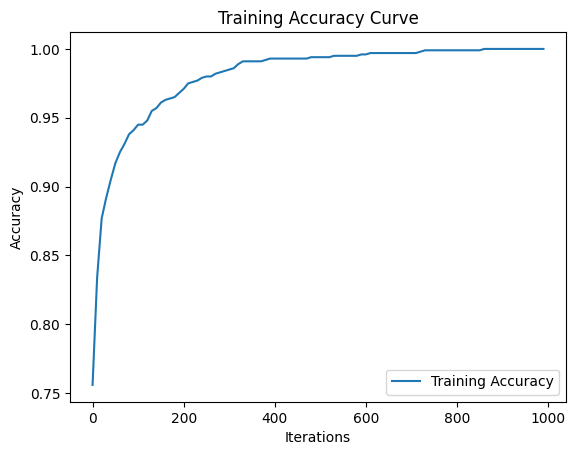

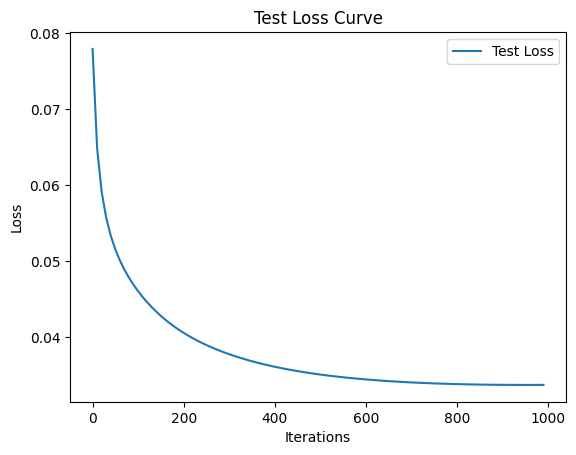

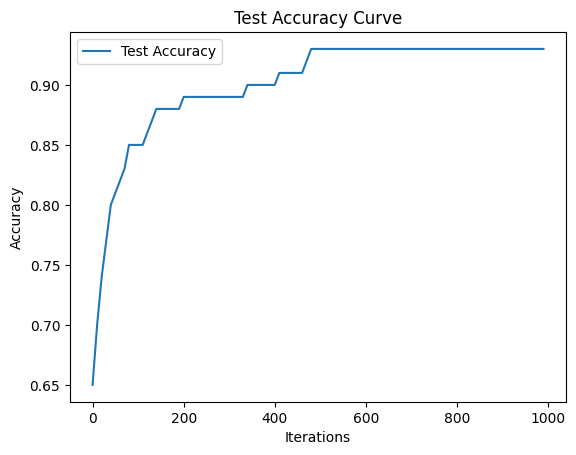

In [6]:
from neural_network.layer import Dense
from neural_network.activation_functions import Tanh
from neural_network.loss_functions import MSE
from neural_network.model import Model

model = Model(
    network=[Dense(28 * 28, 128), Tanh(), Dense(128, 10), Tanh()],
    loss_function=MSE(),
    learning_rate=1e-3,
)

evaluation = model.train(train_set=train_set, test_set=test_set, epochs=1_000, eval_training_every=10)

evaluation.losses.plot_training_loss_curve()

evaluation.accuracies.plot_training_accuracy_curve()

evaluation.losses.plot_testing_loss_curve()

evaluation.accuracies.plot_testing_accuracy_curve()